# Do strict gun laws affect mortality?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
dataurl = "https://raw.githubusercontent.com/kglan/MSDS/main/DATA608/Story3/2020%20GUN%20LAW%20SCORECARD.csv"
df = pd.read_csv(dataurl)
df.head(10)

,Gun Law Strength(Ranked),State,Grade,Grade Rank,Gun Death Rate(Ranked),Gun Death Rate(per 100K)
0,41.0,Alaska,F,5,6.0,23.5
1,31.0,Alabama,F,5,5.0,23.6
2,50.0,Arkansas,F,5,8.0,22.6
3,42.0,Arizona,F,5,20.0,16.7
4,1.0,California,A,1,44.0,8.5
5,13.0,Colorado,B,2,22.0,15.4
6,3.0,Connecticut,A-,1,45.0,6.0
7,NaN,District of Columbia,F,5,NaN,21.9
8,12.0,Delaware,B,2,25.0,14.3
9,24.0,Florida,C-,4,29.0,13.7


## Likert Scale

In [3]:
# Calculate quantiles to define the Likert scale categories
quantiles = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
quantile_labels = ["Very Strict", "Strict", "Moderate", "Lax", "Very Lax"]

df["Gun Control Category"] = pd.qcut(df["Gun Law Strength(Ranked)"], q=quantiles, labels=quantile_labels)
# Delete the row where State is "District of Columbia"
df = df[df['State'] != 'District of Columbia']
# Display the categorized data
df.head(10)

,Gun Law Strength(Ranked),State,Grade,Grade Rank,Gun Death Rate(Ranked),Gun Death Rate(per 100K),Gun Control Category
0,41.0,Alaska,F,5,6.0,23.5,Very Lax
1,31.0,Alabama,F,5,5.0,23.6,Lax
2,50.0,Arkansas,F,5,8.0,22.6,Very Lax
3,42.0,Arizona,F,5,20.0,16.7,Very Lax
4,1.0,California,A,1,44.0,8.5,Very Strict
5,13.0,Colorado,B,2,22.0,15.4,Strict
6,3.0,Connecticut,A-,1,45.0,6.0,Very Strict
8,12.0,Delaware,B,2,25.0,14.3,Strict
9,24.0,Florida,C-,4,29.0,13.7,Moderate
10,28.0,Georgia,F,5,15.0,17.7,Moderate


In [4]:
# Calculate the correlation between Gun Control Category and Gun Death Rate(Ranked)
correlation = df["Gun Control Category"].astype("category").cat.codes.corr(df["Gun Death Rate(Ranked)"], method="spearman")

# Display the correlation coefficient
print(f"Correlation between Gun Control Category and Gun Death Rate(Ranked): {correlation:.2f}")

Correlation between Gun Control Category and Gun Death Rate(Ranked): -0.73


## Barplot

C:\Users\Keeno\AppData\Local\Temp\ipykernel_25208\1757069127.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby("Gun Control Category")["Gun Death Rate(per 100K)"].mean().reset_index()
C:\Users\Keeno\AppData\Local\Temp\ipykernel_25208\1757069127.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Gun Control Category", y="Gun Death Rate(per 100K)", data=grouped, palette="viridis")


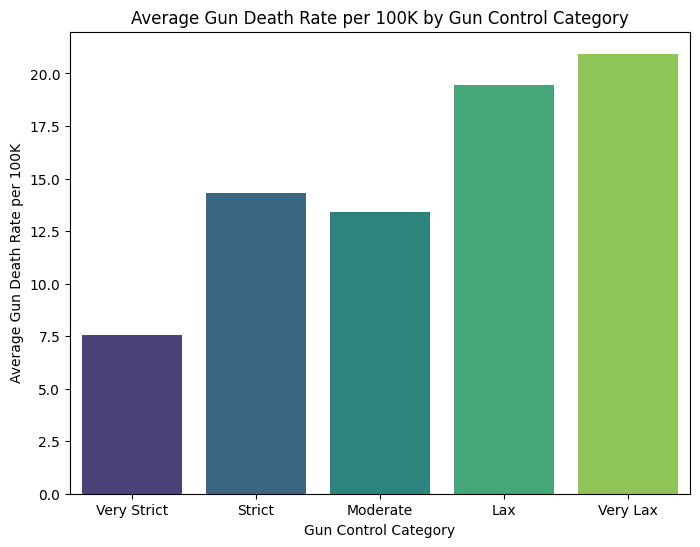

In [5]:
# Group the data by Gun Control Category and calculate the mean gun death rate per 100K
grouped = df.groupby("Gun Control Category")["Gun Death Rate(per 100K)"].mean().reset_index()

# Create a bar chart with different colors
plt.figure(figsize=(8, 6))
sns.barplot(x="Gun Control Category", y="Gun Death Rate(per 100K)", data=grouped, palette="viridis")
plt.xlabel("Gun Control Category")
plt.ylabel("Average Gun Death Rate per 100K")
plt.title("Average Gun Death Rate per 100K by Gun Control Category")
plt.show()


## Boxplot

C:\Users\Keeno\AppData\Local\Temp\ipykernel_25208\3371457200.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Gun Control Category", y="Gun Death Rate(per 100K)", data=df, palette="viridis")


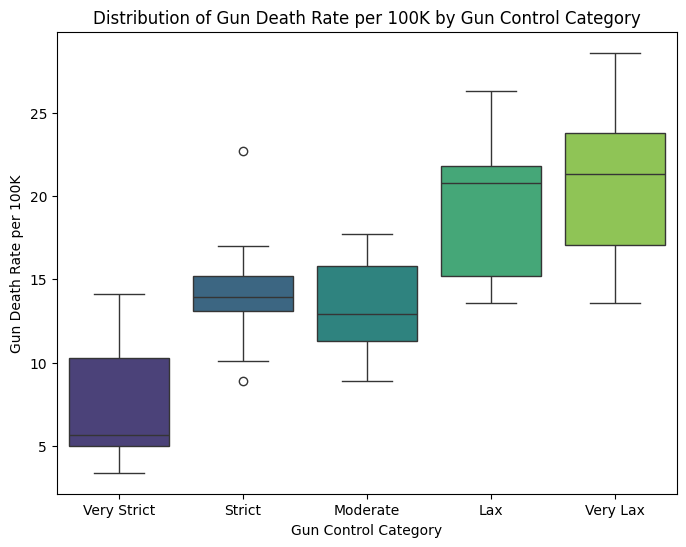

In [6]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Gun Control Category", y="Gun Death Rate(per 100K)", data=df, palette="viridis")
plt.xlabel("Gun Control Category")
plt.ylabel("Gun Death Rate per 100K")
plt.title("Distribution of Gun Death Rate per 100K by Gun Control Category")
plt.show()

## Scatterplot

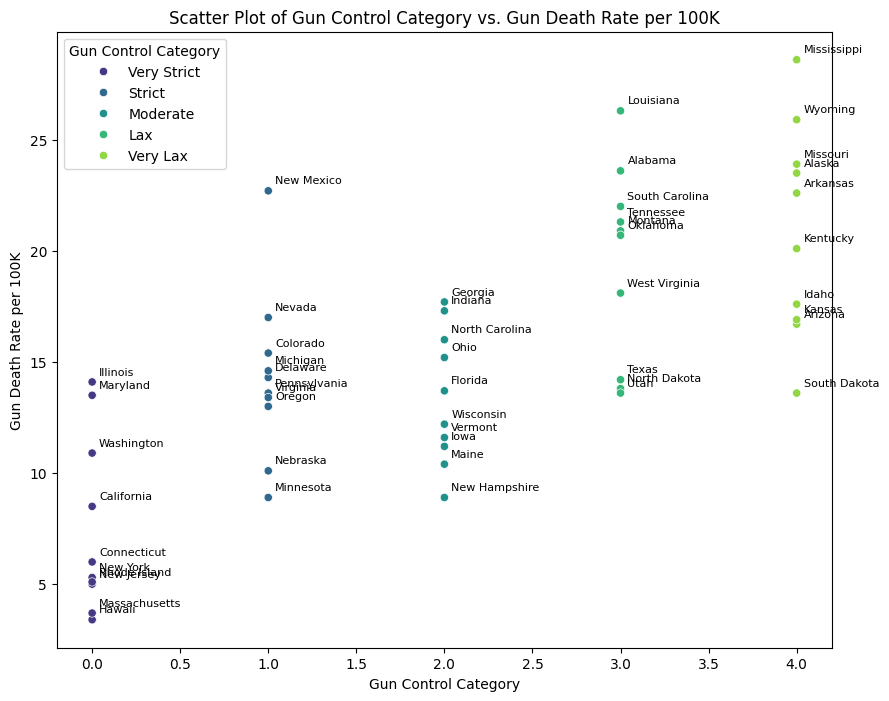

In [7]:
# Reset the index of the DataFrame to avoid index-related issues
df = df.reset_index(drop=True)

# Create a scatter plot with different colors for each category
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(data=df, x=df["Gun Control Category"].astype("category").cat.codes, y=df["Gun Death Rate(per 100K)"], hue=df["Gun Control Category"], palette="viridis")
plt.xlabel("Gun Control Category")
plt.ylabel("Gun Death Rate per 100K")
plt.title("Scatter Plot of Gun Control Category vs. Gun Death Rate per 100K")
plt.legend(title="Gun Control Category")

# Annotate each point with the state names in small letters for non-null values
for line in range(0, df.shape[0]):
    if not pd.isnull(df["Gun Control Category"].iloc[line]) and not pd.isnull(df["Gun Death Rate(per 100K)"].iloc[line]):
        plt.annotate(df["State"].iloc[line], (df["Gun Control Category"].astype("category").cat.codes[line], df["Gun Death Rate(per 100K)"].iloc[line]), textcoords="offset points", xytext=(5,5), size=8, color='black')

plt.show()

# Heatmap

<Axes: >

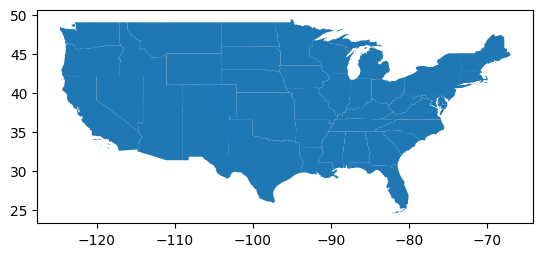

In [8]:
states = gpd.read_file('usa-states-census-2014.shp')
type(states)
states.plot()

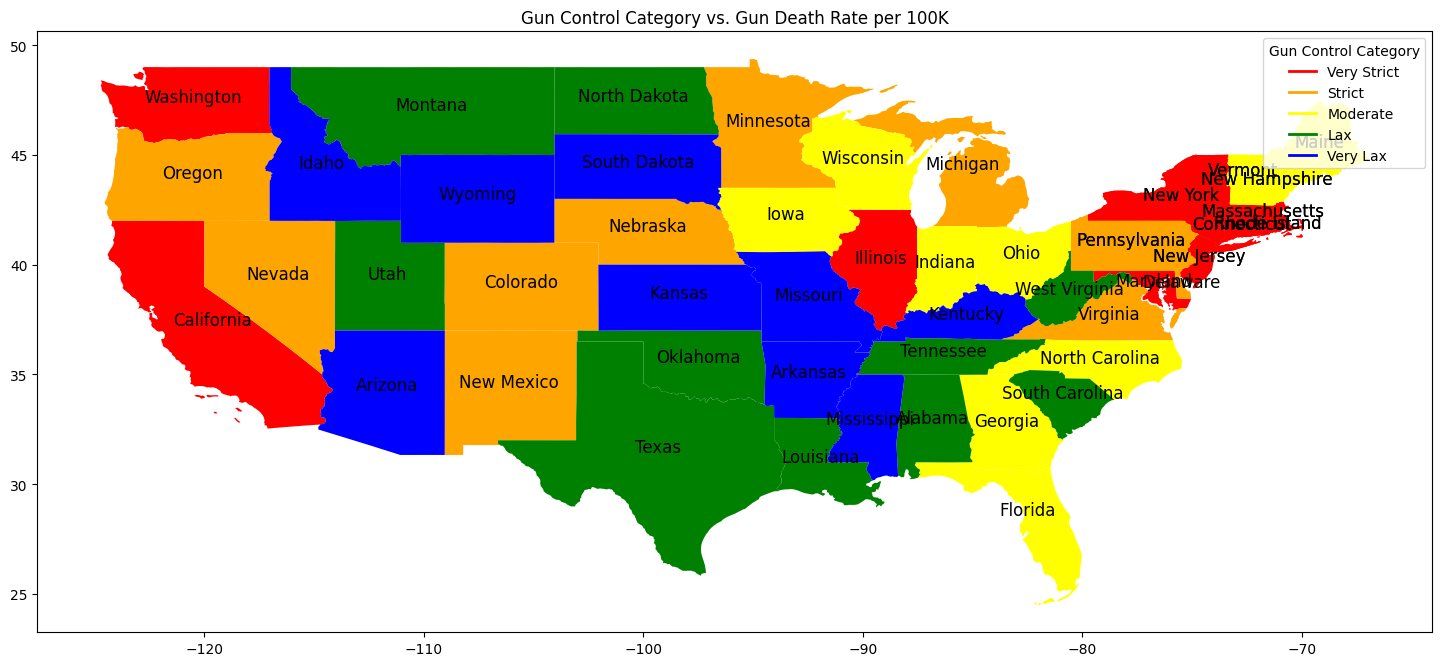

In [9]:
import matplotlib.pyplot as plt
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load the US states GeoDataFrame
states = gpd.read_file('usa-states-census-2014.shp')

# Define your DataFrame df with gun control data
# Assuming you have a column 'Gun Control Category' and 'Gun Death Rate(per 100K)' in df

# Filter the DataFrame to get the relevant columns for the heatmap
heatmap_data = df[['State', 'Gun Control Category', 'Gun Death Rate(per 100K)']]

# Merge the heatmap data with the states GeoDataFrame based on the 'State' column
merged_data = states.merge(heatmap_data, left_on='NAME', right_on='State')

# Define colors for each category
category_colors = {
    'Very Strict': 'red',
    'Strict': 'orange',
    'Moderate': 'yellow',
    'Lax': 'green',
    'Very Lax': 'blue'
}

# Create the heatmap
fig, ax = plt.subplots(1, 1, figsize=(18, 12))

# Create empty handles and labels for the legend
legend_handles = []
legend_labels = []

for category, color in category_colors.items():
    states_data = merged_data[merged_data['Gun Control Category'] == category]
    states_data.plot(
        color=color,
        linewidth=0.8,
        ax=ax,
        label=category
    )
    
    # Add the category to the legend
    legend_handles.append(plt.Line2D([0], [0], color=color, lw=2))
    legend_labels.append(category)

# Add labels to the states
for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data.NAME):
    ax.annotate(label, xy=(x, y), ha='center', fontsize=12)

# Add a title to the heatmap
ax.set_title('Gun Control Category vs. Gun Death Rate per 100K')

# Create the legend
ax.legend(legend_handles, legend_labels, title='Gun Control Category')

plt.show()


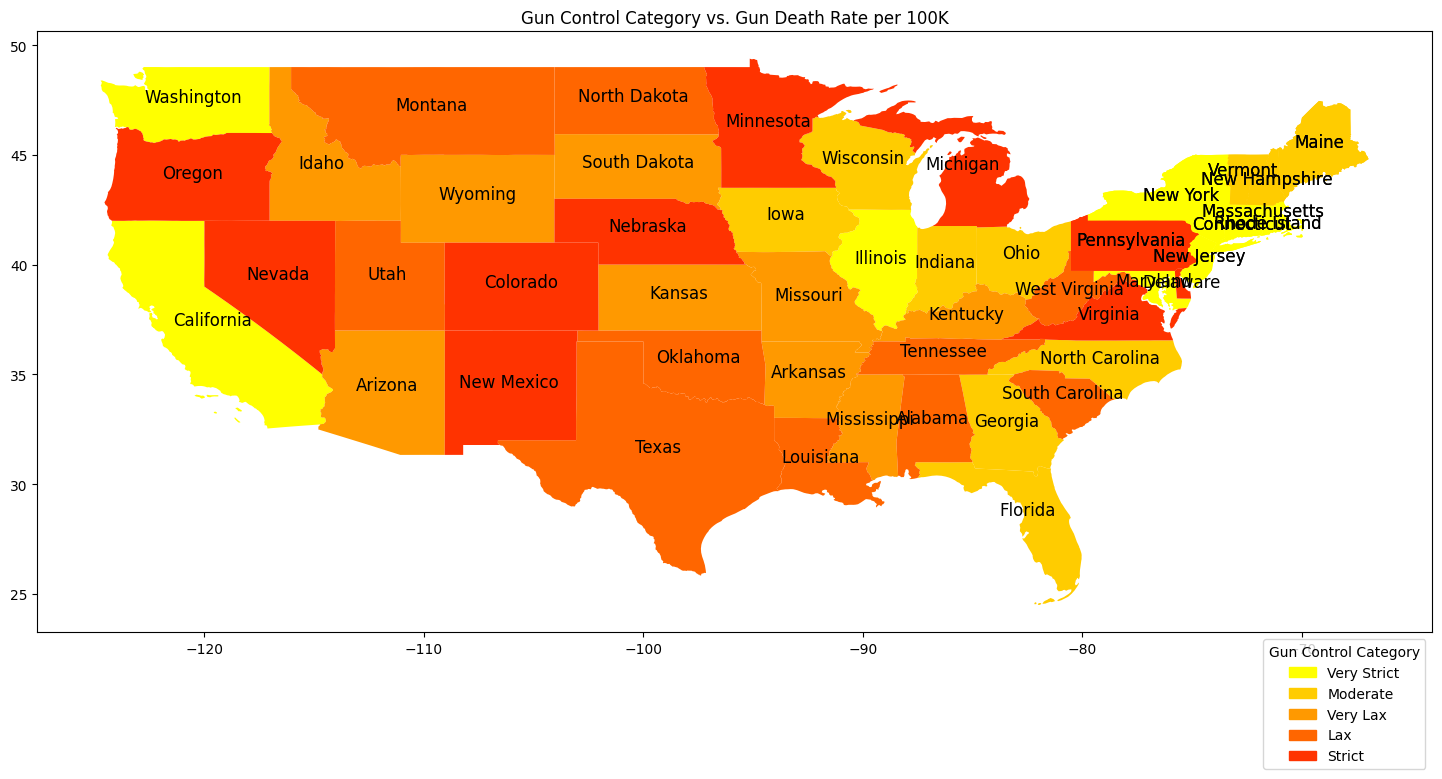

In [10]:
import matplotlib.pyplot as plt
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.patches import Patch

# Load the US states GeoDataFrame
states = gpd.read_file('usa-states-census-2014.shp')

# Define your DataFrame df with gun control data
# Assuming you have a column 'Gun Control Category' and 'Gun Death Rate(per 100K)' in df

# Filter the DataFrame to get the relevant columns for the heatmap
heatmap_data = df[['State', 'Gun Control Category', 'Gun Death Rate(per 100K)']]

# Merge the heatmap data with the states GeoDataFrame based on the 'State' column
merged_data = states.merge(heatmap_data, left_on='NAME', right_on='State')

# Define a custom color scale related like a heatmap
# Here, we define a list of colors that go from light yellow to dark red
heatmap_colors = ['#FFFF00', '#FFCC00', '#FF9900', '#FF6600', '#FF3300', '#FF0000']

# Create the heatmap
fig, ax = plt.subplots(1, 1, figsize=(18, 12))

# Initialize a list to hold legend handles
legend_handles = []

# Plot each state with its color based on 'Gun Control Category'
for idx, category in enumerate(merged_data['Gun Control Category'].unique()):
    states_data = merged_data[merged_data['Gun Control Category'] == category]
    states_data.plot(
        color=heatmap_colors[idx],
        linewidth=0.8,
        ax=ax,
        label=category
    )
    # Add legend handles
    legend_handles.append(Patch(color=heatmap_colors[idx], label=category))

# Add labels to the states
for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data.NAME):
    ax.annotate(label, xy=(x, y), ha='center', fontsize=12)

# Add a title to the heatmap
ax.set_title('Gun Control Category vs. Gun Death Rate per 100K')

# Create the legend with color patches
legend = ax.legend(handles=legend_handles, title='Gun Control Category')

# Set the legend position and format
legend.set_bbox_to_anchor((1, 0))  # Adjust the coordinates to place the legend in the bottom right

plt.show()


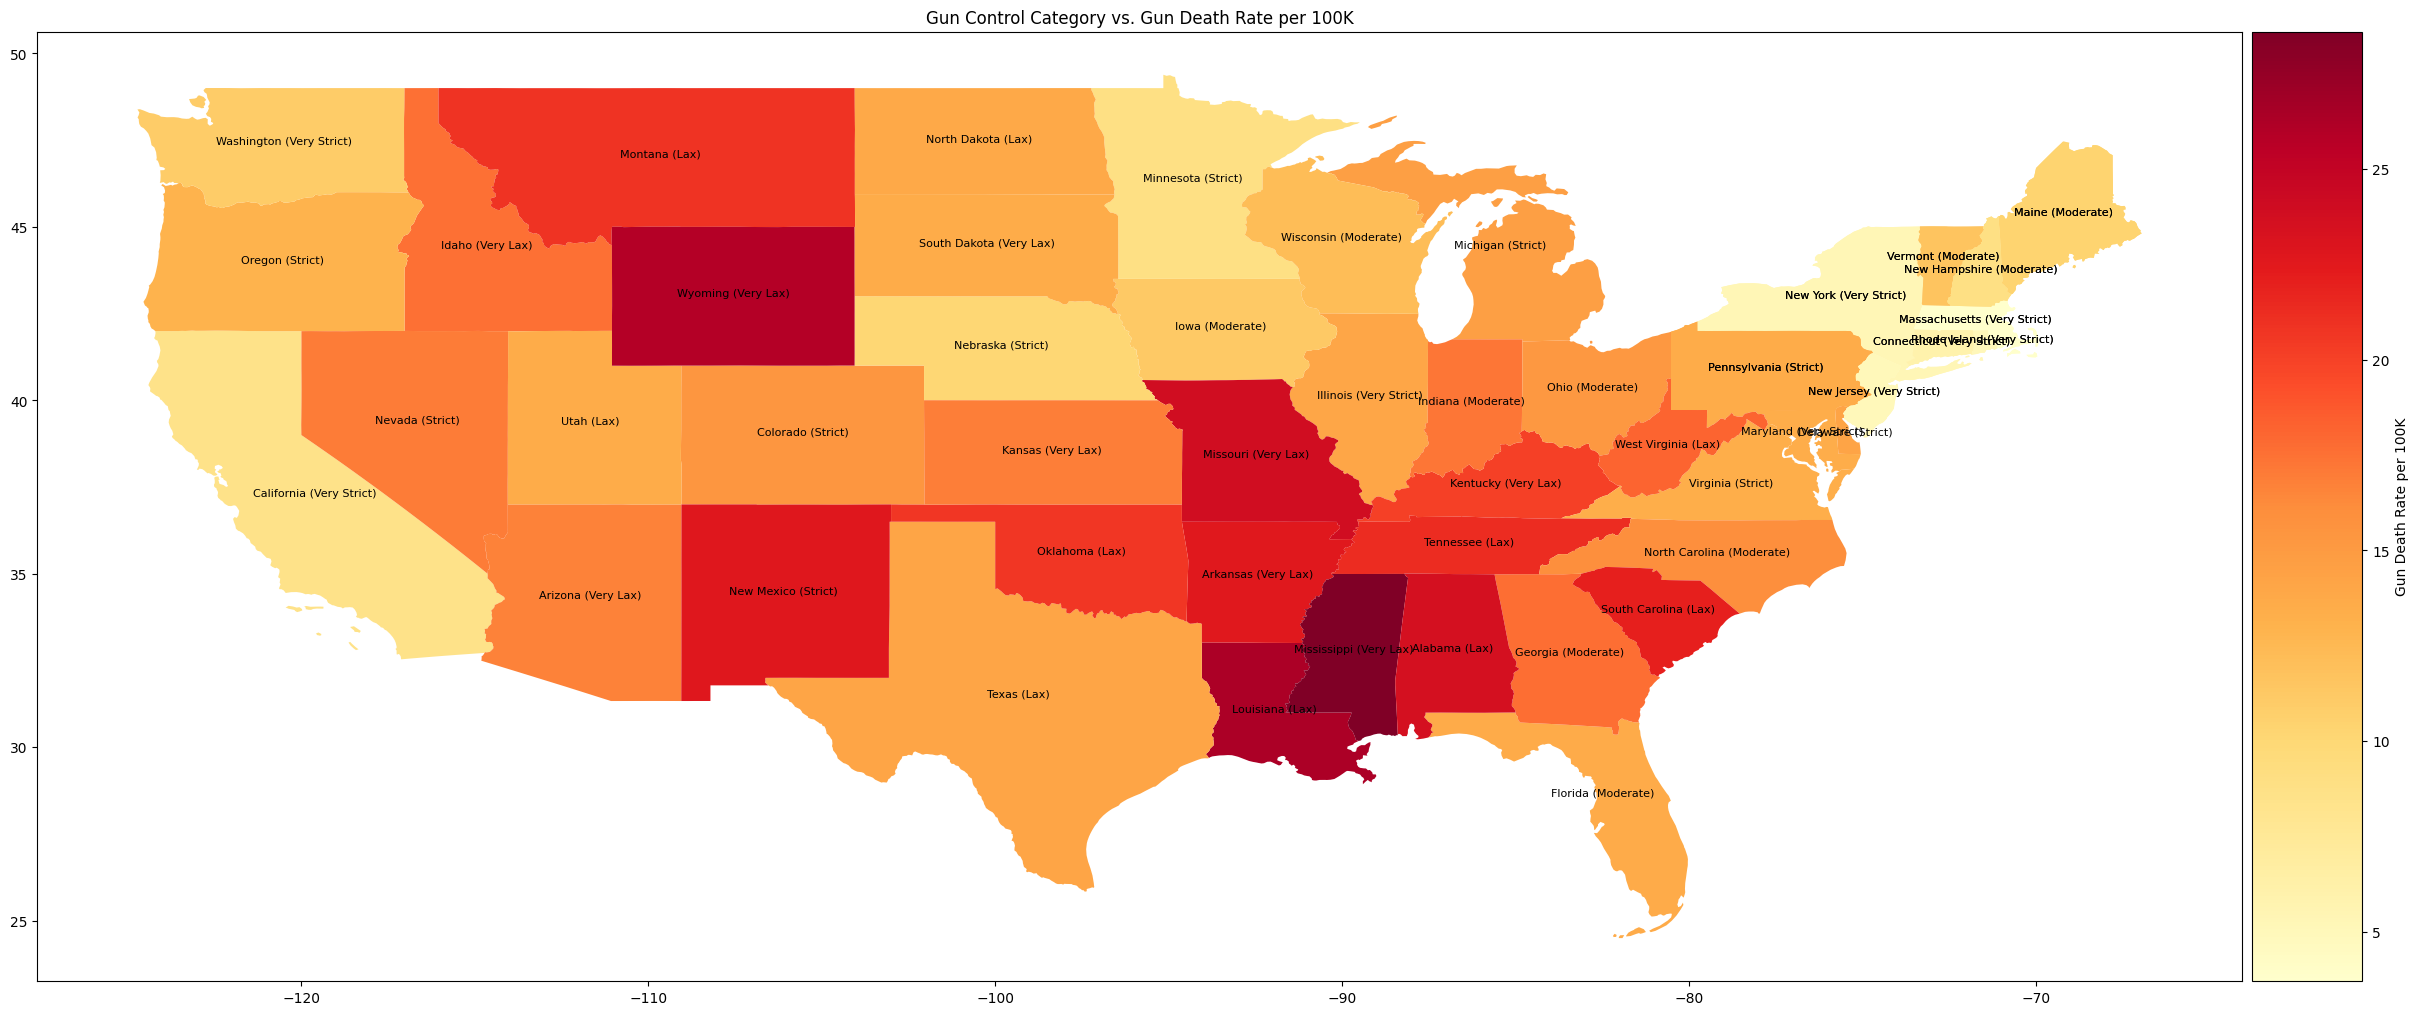

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load the US states GeoDataFrame
states = gpd.read_file('usa-states-census-2014.shp')

# Define your DataFrame df with gun control data
# Assuming you have a column 'Gun Control Category' and 'Gun Death Rate(per 100K)' in df

# Filter the DataFrame to get the relevant columns for the heatmap
heatmap_data = df[['State', 'Gun Control Category', 'Gun Death Rate(per 100K)']]

# Merge the heatmap data with the states GeoDataFrame based on the 'State' column
merged_data = states.merge(heatmap_data, left_on='NAME', right_on='State')

# Define a custom color scale related like a heatmap
cmap = 'YlOrRd'  # Yellow to Orange to Red colormap

# Normalize Gun Death Rate within the minimum and maximum values
vmin = merged_data['Gun Death Rate(per 100K)'].min()
vmax = merged_data['Gun Death Rate(per 100K)'].max()

# Create the heatmap
fig, ax = plt.subplots(1, 1, figsize=(30, 40))

# Create a color map based on 'Gun Death Rate'
mappable = merged_data.plot(column='Gun Death Rate(per 100K)', cmap=cmap, linewidth=0.8, ax=ax, legend=False, vmin=vmin, vmax=vmax)

# Add labels to the states with Gun Control Category
for x, y, label, category in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data.NAME, merged_data['Gun Control Category']):
    ax.annotate(f'{label} ({category})', xy=(x, y), ha='center', fontsize=8)  # Smaller font size

# Add a title to the heatmap
ax.set_title('Gun Control Category vs. Gun Death Rate per 100K')

# Create a colorbar to represent the relationship between Gun Control and Death Rate
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm, cax=cax)
cbar.set_label('Gun Death Rate per 100K')

plt.show()
